In [2]:
#author: Syaiful Alam
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys
!{sys.executable} -m pip install lasio

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd

### Data loading

In [5]:
import lasio
las=lasio.read('well-1.las')

In [6]:
tugas=las.df()
kujung=tugas.loc[3337.79:3751.5]
print(kujung)

         CALI       DT      GR    ILD   MSFL  NPHI_LS   RHOB
DEPTH                                                       
3338.0  8.617  123.625  88.812  1.006  1.292  0.48193  2.264
3338.5  8.562  116.875  79.500  1.182  1.258  0.46924  2.320
3339.0  8.594  100.000  68.562  1.417  1.250  0.37354  2.408
3339.5  8.492   83.938  51.500  1.742  1.430  0.21143  2.562
3340.0  8.297   65.750  33.844  2.174  7.311  0.13428  2.668
...       ...      ...     ...    ...    ...      ...    ...
3749.5  8.555  130.625  85.000  0.773  0.873  0.43115  2.184
3750.0  8.648  130.875  87.500  0.772  0.891  0.43164  2.170
3750.5  8.680  130.875  86.250  0.775  1.158  0.44092  2.178
3751.0  8.727  129.375  89.188  0.773  1.072  0.42285  2.184
3751.5  8.633  129.500  89.688  0.772  1.035  0.40430  2.191

[828 rows x 7 columns]


### Rw, Sw Calculation

In [7]:
m_dens=2.65
f_dens=1

def density_porosity(rhob,m_dens,f_dens):
    pore_dens=(m_dens-rhob)/(m_dens-f_dens)
    return(pore_dens)

In [8]:
kujung['pore_dens']=density_porosity(kujung['RHOB'],m_dens,f_dens)
pore=pd.DataFrame(kujung)
print(pore)

         CALI       DT      GR    ILD   MSFL  NPHI_LS   RHOB  pore_dens
DEPTH                                                                  
3338.0  8.617  123.625  88.812  1.006  1.292  0.48193  2.264   0.233939
3338.5  8.562  116.875  79.500  1.182  1.258  0.46924  2.320   0.200000
3339.0  8.594  100.000  68.562  1.417  1.250  0.37354  2.408   0.146667
3339.5  8.492   83.938  51.500  1.742  1.430  0.21143  2.562   0.053333
3340.0  8.297   65.750  33.844  2.174  7.311  0.13428  2.668  -0.010909
...       ...      ...     ...    ...    ...      ...    ...        ...
3749.5  8.555  130.625  85.000  0.773  0.873  0.43115  2.184   0.282424
3750.0  8.648  130.875  87.500  0.772  0.891  0.43164  2.170   0.290909
3750.5  8.680  130.875  86.250  0.775  1.158  0.44092  2.178   0.286061
3751.0  8.727  129.375  89.188  0.773  1.072  0.42285  2.184   0.282424
3751.5  8.633  129.500  89.688  0.772  1.035  0.40430  2.191   0.278182

[828 rows x 8 columns]


In [9]:
a=1
m=2
n=2
ild=pore['ILD']
nphi=pore['NPHI_LS']
def water_resistivity(nphi,ild,m,a):
    rw_calc=(nphi**m)*((ild)/a)
    return(rw_calc)
pore['rw_calc']=water_resistivity(nphi,ild,m,a)
print(pore)

         CALI       DT      GR    ILD   MSFL  NPHI_LS   RHOB  pore_dens  \
DEPTH                                                                     
3338.0  8.617  123.625  88.812  1.006  1.292  0.48193  2.264   0.233939   
3338.5  8.562  116.875  79.500  1.182  1.258  0.46924  2.320   0.200000   
3339.0  8.594  100.000  68.562  1.417  1.250  0.37354  2.408   0.146667   
3339.5  8.492   83.938  51.500  1.742  1.430  0.21143  2.562   0.053333   
3340.0  8.297   65.750  33.844  2.174  7.311  0.13428  2.668  -0.010909   
...       ...      ...     ...    ...    ...      ...    ...        ...   
3749.5  8.555  130.625  85.000  0.773  0.873  0.43115  2.184   0.282424   
3750.0  8.648  130.875  87.500  0.772  0.891  0.43164  2.170   0.290909   
3750.5  8.680  130.875  86.250  0.775  1.158  0.44092  2.178   0.286061   
3751.0  8.727  129.375  89.188  0.773  1.072  0.42285  2.184   0.282424   
3751.5  8.633  129.500  89.688  0.772  1.035  0.40430  2.191   0.278182   

         rw_calc  
DEPTH

In [12]:
rw_calc=pore['rw_calc']
def water_saturation(nphi,m,a,n,rw_calc,ild):
    sw_calc=((a/(nphi**m))*(rw_calc/ild))**(1/n)
    return(sw_calc)
pore['sw_calc']=water_saturation(nphi,m,a,n,rw_calc,ild)
kujung_final=pore
print(kujung_final)

         CALI       DT      GR    ILD   MSFL  NPHI_LS   RHOB  pore_dens  \
DEPTH                                                                     
3338.0  8.617  123.625  88.812  1.006  1.292  0.48193  2.264   0.233939   
3338.5  8.562  116.875  79.500  1.182  1.258  0.46924  2.320   0.200000   
3339.0  8.594  100.000  68.562  1.417  1.250  0.37354  2.408   0.146667   
3339.5  8.492   83.938  51.500  1.742  1.430  0.21143  2.562   0.053333   
3340.0  8.297   65.750  33.844  2.174  7.311  0.13428  2.668  -0.010909   
...       ...      ...     ...    ...    ...      ...    ...        ...   
3749.5  8.555  130.625  85.000  0.773  0.873  0.43115  2.184   0.282424   
3750.0  8.648  130.875  87.500  0.772  0.891  0.43164  2.170   0.290909   
3750.5  8.680  130.875  86.250  0.775  1.158  0.44092  2.178   0.286061   
3751.0  8.727  129.375  89.188  0.773  1.072  0.42285  2.184   0.282424   
3751.5  8.633  129.500  89.688  0.772  1.035  0.40430  2.191   0.278182   

         rw_calc  sw_cal

### Exploratory Data Analysis on the calculated Rw, Sw Log

#### Measures of central tendency

In [23]:
print('mean in kujung_final: \n' + str(kujung_final.mean())+'\n')
print('median in kujung_final: \n' + str(kujung_final.median()))

mean in kujung_final: 
CALI           8.588909
DT           118.736715
GR            76.343841
ILD            1.109170
MSFL           1.743801
NPHI_LS        0.381769
RHOB           2.225851
pore_dens      0.257060
rw_calc        0.154674
sw_calc        0.794252
dtype: float64

median in kujung_final: 
CALI           8.539000
DT           119.375000
GR            79.750000
ILD            1.061000
MSFL           1.343500
NPHI_LS        0.387700
RHOB           2.230000
pore_dens      0.254545
rw_calc        0.152117
sw_calc        0.785523
dtype: float64


#### Measures of dispersion

In [24]:
print('range in kujung_final: \n' + str(kujung_final.max()-kujung_final.min())+'\n')
print('variance in kujung_final: \n' + str(kujung_final.var())+'\n')
print('standard deviation in kujung_final: \n' + str(kujung_final.std()))

range in kujung_final: 
CALI          2.742000
DT           98.625000
GR           83.547000
ILD           5.441000
MSFL         42.369000
NPHI_LS       0.366700
RHOB          0.844000
pore_dens     0.511515
rw_calc       0.304077
sw_calc       1.476663
dtype: float64

variance in kujung_final: 
CALI           0.115627
DT           147.692732
GR           180.917350
ILD            0.166698
MSFL          10.636811
NPHI_LS        0.002903
RHOB           0.005117
pore_dens      0.001880
rw_calc        0.001039
sw_calc        0.017501
dtype: float64

standard deviation in kujung_final: 
CALI          0.340040
DT           12.152890
GR           13.450552
ILD           0.408286
MSFL          3.261412
NPHI_LS       0.053883
RHOB          0.071534
pore_dens     0.043354
rw_calc       0.032237
sw_calc       0.132292
dtype: float64


In [25]:
print(kujung_final.describe())

             CALI          DT          GR         ILD        MSFL     NPHI_LS  \
count  828.000000  828.000000  828.000000  828.000000  828.000000  828.000000   
mean     8.588909  118.736715   76.343841    1.109170    1.743801    0.381769   
std      0.340040   12.152890   13.450552    0.408286    3.261412    0.053883   
min      7.680000   57.625000   17.641000    0.563000    0.460000    0.119630   
25%      8.344000  110.531000   69.188000    0.864750    1.119000    0.349120   
50%      8.539000  119.375000   79.750000    1.061000    1.343500    0.387700   
75%      8.758000  128.031250   85.453500    1.267250    1.583000    0.419920   
max     10.422000  156.250000  101.188000    6.004000   42.829000    0.486330   

             RHOB   pore_dens     rw_calc     sw_calc  
count  828.000000  828.000000  828.000000  828.000000  
mean     2.225851    0.257060    0.154674    0.794252  
std      0.071534    0.043354    0.032237    0.132292  
min      1.875000   -0.041818    0.039200    0

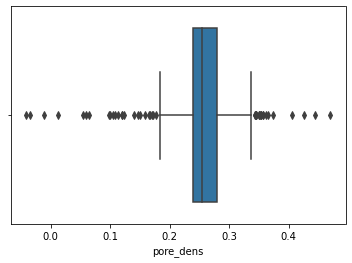

In [26]:
sbn.boxplot(kujung_final['pore_dens'])
plt.show()

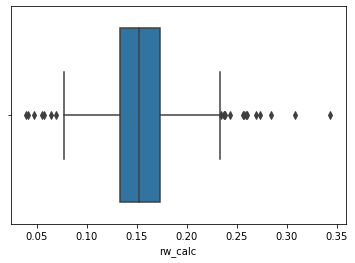

In [27]:
sbn.boxplot(kujung_final['rw_calc'])
plt.show()

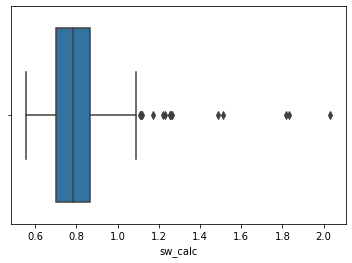

In [28]:
sbn.boxplot(kujung_final['sw_calc'])
plt.show()

<AxesSubplot:xlabel='pore_dens', ylabel='Density'>

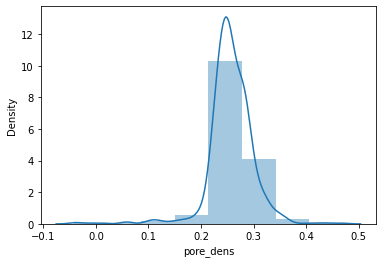

In [29]:
sbn.distplot(kujung_final['pore_dens'],bins=8)

<AxesSubplot:xlabel='rw_calc', ylabel='Density'>

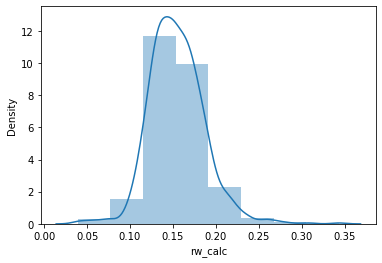

In [30]:
sbn.distplot(kujung_final['rw_calc'],bins=8)

<AxesSubplot:xlabel='sw_calc', ylabel='Density'>

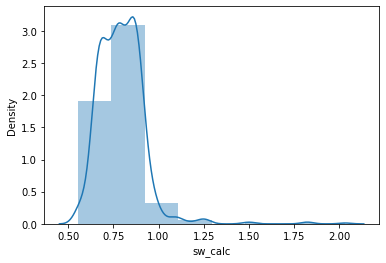

In [31]:
sbn.distplot(kujung_final['sw_calc'],bins=8)

# End